# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Q1. Is the distribution of body temperatures normal?

Eyeballing the dataset to check basic things like number,char and stats.

In [3]:
from IPython.display import display
print(df.sample(5))
df.describe()

     temperature gender  heart_rate
79          97.6      M        74.0
123         97.2      F        66.0
128         97.9      M        72.0
8           98.4      F        84.0
106         97.0      M        80.0


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Using graphical tools to check for Normal distribution.

Null Hypothesis($H_0$): The human body temperatures do **NOT follow Normal Distribution**.
    
Step 1: Drawing a box plot to check for symmetry. 

Step 2: Drawing a histrogram to check for Normality.

Step 3: Overlaying a normal distribution to visually compare the distribution. 

Step 4: Comparing skewness, kurtosis, mean and median

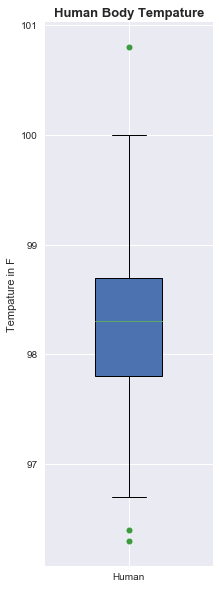

In [4]:
fig, axes = plt.subplots(figsize=(3, 10))
#fig.suptitle('Human Body Tempature', fontsize=13, fontweight='bold')
axes.set_ylabel('Tempature in F')
axes.set_title('Human Body Tempature', fontsize=13, fontweight='bold')

_ = axes.boxplot(
    [df.temperature],positions = [1],labels = ['Human'], \
    patch_artist = True, widths = 0.4,showfliers=True,sym='gx')

for flier in _['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=.75)
plt.show()

Observation: The temperature distribution seems to be normal as we can see that the whiskers each is longer than the distance between 25th and median and the distance between median and 75th. 

Checking with Histrogram and pValue. We will overlay the normal distribution for visual clue.

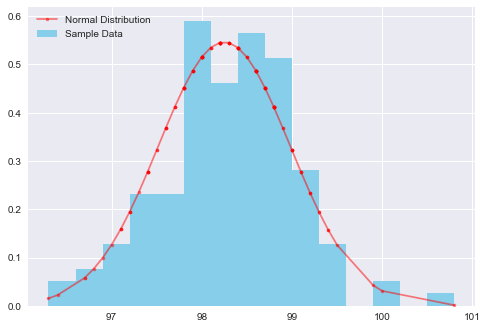

In [5]:
import numpy as np
from scipy.stats import kurtosis,skew
import scipy.stats as stats


temp_sorted=sorted(df.temperature)
hmean = np.mean(temp_sorted)
hstd = np.std(temp_sorted)
pdf = stats.norm.pdf(temp_sorted, hmean, hstd) # this is fitted 
plt.plot(temp_sorted, pdf,marker='.',color='red', alpha=0.5,label='Normal Distribution') 
# including temp_sorted here is crucial

_=plt.hist(df.temperature, normed=True, bins=15,color = "skyblue", ec="skyblue",lw=0,label='Sample Data') 
#adding the data graph
_=plt.legend(loc='upper left')
plt.show()

In [6]:
print("mean  : ", np.mean(df.temperature))
print("var   : ", np.var(df.temperature))
print("skew  : ",skew(df.temperature))
print("kurt  : ",kurtosis(df.temperature))
print('Median: ',np.median(df.temperature))
print('pValue: ',str(round(stats.normaltest(df.temperature)[1],4)*100)+'%') # formating to percentage

mean  :  98.24923076923078
var   :  0.5334224852071
skew  :  -0.004367976879081625
kurt  :  0.7049597854114693
Median:  98.3
pValue:  25.87%


Based on above above analysis I can REJECT the null hypothesis. That means that our dataset follows a normal distribution.

Quick Note on pValue: A p-value is the probability that the results from the sample data occurred by chance. Low p-values are good; They indicate that the data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

## Q2 (a) Is the sample size large?

We can use the below formula for checking the sample size. <br>

Let us assume the below stats for calculating the required sample size.
a) Confidence Level at 95% <br>
b) Margin of Error at +-5 - we can only allow +-5 variation <br>
c) z score for 95% CL is 1.96 - we took this from z-score table <br>
    90% – Z Score = 1.645<br>
    95% – Z Score = 1.96 <br>
    99% – Z Score = 2.576 <br>

d) stdDev of the population as 0.5 <br>


Necessary Sample Size = ((Z-score)**2 * StdDev*(1-StdDev)) / ((margin of error)**2)

In [7]:
def sample_size(zscore,stdDev,error):
    import math
    return math.ceil((zscore**2)*(stdDev)*(1-stdDev) / (error**2))

We will check the sample size based on 95% CL 1st and repeat it for 90% and 99% CL.

In [8]:
required90 = sample_size(1.645,.5,0.1) # Checking with 95% CL
required95 = sample_size(1.96,.5,0.05) # Checking with 95% CL
required99 = sample_size(2.576,.5,0.01) # Checking with 95% CL

given = len(df)

print('Given sample size:', given)
print('Required sample size with 90% CL +-10 Margin of error:',required90)
print('Required sample size with 95% CL +-5 Margin of error:',required95)
print('Required sample size with 99% CL +-1 Margin of error:',required99)

Given sample size: 130
Required sample size with 90% CL +-10 Margin of error: 68
Required sample size with 95% CL +-5 Margin of error: 385
Required sample size with 99% CL +-1 Margin of error: 16590


We can see clearly see that we need 385 readings for 95% CL with +-5 error and 68 readings for 90% with +-10 error
and our sample size is only 130. 
This tells us that our sample size is adquate but not sufficient. Given an opportunity, we should ask for 385 readings.

For CLT, a size of 130 is good but CLT has it own limitations.

## Q2 (b) Are the observations independent?

In [9]:
df.describe() # we will start with basic stats.

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


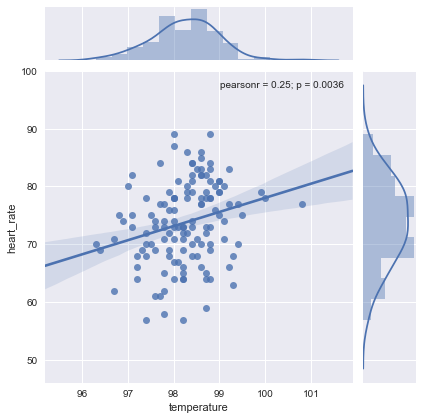

In [10]:
sns.jointplot(x="temperature", y="heart_rate", data=df, kind="reg")
plt.show()

Using seaborn joint plot with regression, we can say that our data do not follow a +ve or -ve trend.

We can conclude from the figure above that the observations look independent but we know for the fact (Biologically) that heart rate and body tempature are related at some point. We need more data to establish the correlation between body temperature and heart rate.

# Q3. Is the true population mean really 98.6 degrees F? <br>
Would you use a one-sample or two-sample test? Why? <br>
In this situation, is it appropriate to use the  t  or  z  statistic? <br>
Now try using the other test. How is the result be different? Why? 

We will use one-sample t-test as we are assuming that population mean is 98.6F. 
We only have to check if there is any sigficant difference between 98.6 degree F and the mean of the dataset.

$H_0$:Population mean is <font size=4 color=green>equal to 98.6</font> degreesF. <br>
$H_1$:Population mean is <font size=4 color=green>not equal to 98.6 </font>degreesF.


Quick Note on pValue: A p-value is the probability that the results from the sample data occurred by chance. Low p-values are good; They indicate that the data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

In [11]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [12]:
stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Our pValue is less than 0.01 means there is only a 1% probability that the results happened by chance. 
We can safely REJECT our $H_0$ which means the population mean is NOT 98.6

# Performing z-statistic and t-statistic

## t-statistic is calculated as per the below formula

\begin{equation}
\ t = \frac{\bar{\mathtt{x}} -\mu_0}{\frac{s}{\sqrt{n}}}\\ 
\end{equation}

\begin{align}
\bar{\mathtt{x}} = sample\,mean\\
\mu_0 = hypothesized \, population\,mean\\ 
\ s = sample \,standard \, deviation\\ 
\ n = sample \,size \\
\end{align}

Quick Note: for t stats the sample size should be (≥ 30). 


Getting basic stats and a function to calculate t and z stats. 

In [13]:
sample_mean=np.mean(df.temperature)
sample_stdDev=np.std(df.temperature) # This is stdDev of the sample. 
                              #We assumed stdDev of the population as 0.5 for checking sample size.
hpothesized_popmean=98.6 # we will use the Q2 value
sample_var=np.var(df.temperature)
sample_n=len(df.temperature)

def tzstats(mean,popmean,stdDev,sampleSize):
    return ((mean-popmean)/(stdDev/(sampleSize**0.5)))

Calculating t-stats using self written function. 

In [14]:
t_value_c=tzstats(sample_mean,hpothesized_popmean,sample_stdDev,len(df)) # using our own function
print('t value(Using custom function):',t_value_c)

t value(Using custom function): -5.475925202078116


In [15]:
p_value_c = stats.t.sf(np.abs(t_value_c), sample_n-1)*2  # two-sided
print('t-statistic (custom function) = %6.3f p_value(custom function) = %6.9f' % (t_value_c, p_value_c))

t-statistic (custom function) = -5.476 p_value(custom function) = 0.000000219


Calculating t-stats using built-in functions. 

In [16]:
t_value_b = (sample_mean-hpothesized_popmean)/np.sqrt(sample_var/float(sample_n))  # t-statistic for mean
p_value_b = stats.t.sf(np.abs(t_value_b), sample_n-1)*2  # two-sided
print('t-statistic(using built in function) = %6.3f p_value(using built in function) = %6.9f' % (t_value_b, p_value_b))

t-statistic(using built in function) = -5.476 p_value(using built in function) = 0.000000219


Our pValue is <0.05 , therefore we can reject the null hypothesis($H_0$:Population mean is equal to $98.6^oF$) 

## z statistic is calculated as per the below formula

\begin{equation}
\ z = \frac{\bar{\mathtt{x}} -\mu_0}{\frac{\sigma}{\sqrt{n}}}\\ 
\end{equation}

\begin{align}
\bar{\mathtt{x}} = sample\,mean\\
\mu_0 = hypothesized\, population\,mean\\ 
\sigma = population \,standard \, deviation\\ 
\ n = sample \,size \\
\end{align}

We assumed stdDev of the population as 0.5 for checking sample size.

Quick Note: The formula for computing a z test statistic for one sample mean is identical to that of computing a t test statistic for one sample mean, except now the population standard deviation is known and can be used in computing the standard error.

Calculating z-stats using self written function.

In [17]:
popstdDev=0.5 #We assumed stdDev of the population as 0.5 for checking sample size.
z_value_c=tzstats(sample_mean,hpothesized_popmean,popstdDev,len(df)) # using our own function
print('z value(Using custom function):',z_value_c)

z value(Using custom function): -7.998769136079786


In [18]:
p_value_z_cdf=stats.norm.cdf(z_value_c) * 2 # two sided
p_value_z_sf=stats.norm.sf(np.abs(z_value_c)) * 2 # two sided
print('p value using cdf:', p_value_z_cdf)
print('p value using sf:',p_value_z_sf )

p value using cdf: 1.25669086414e-15
p value using sf: 1.25669086414e-15


Again, our pValue is <0.05 , therefore we can reject the null hypothesis($H_0$ :Population mean is equal to $98.6^oF$)

# Q4. Draw a small sample of size 10 from the data and repeat both tests.

Which one is the correct one to use? <br>
What do you notice? <br>
What does this tell you about the difference in application of the  t  and  z  statistic?

Sampling the dataset.

In [20]:
r=np.random.permutation(len(df))[:10]
sampled_df = df.ix[r]

Now eyeballing a subset of size 10 to check basic statistics and data 

In [21]:
print(sampled_df.sample(10))
sampled_df.describe()

     temperature gender  heart_rate
56          98.8      F        70.0
59          97.6      M        73.0
61          98.4      M        84.0
122         99.0      F        81.0
128         97.9      M        72.0
74          99.0      M        75.0
91         100.0      F        78.0
37          98.3      M        72.0
28          98.4      F        73.0
83          99.2      F        77.0


,temperature,heart_rate
count,10.000000,10.000000
mean,98.660000,75.500000
std,0.691536,4.453463
min,97.600000,70.000000
25%,98.325000,72.250000
50%,98.600000,74.000000
75%,99.000000,77.750000
max,100.000000,84.000000


Setting basic stats to calculate t and z stats. 

In [22]:
sample10_mean=np.mean(sampled_df.temperature)
sample10_stdDev=np.std(sampled_df.temperature) # This is stdDev of the sample. 
                              #We assumed stdDev of the population as 0.5 for checking sample size.
hpothesized_popmean=98.6 # we will use the Q2 value
sample10_var=np.var(sampled_df.temperature)
sample10_n=len(sampled_df.temperature)

## Calculating t-stats using self written function.

In [23]:
sample10t_value_c=tzstats(sample10_mean,hpothesized_popmean,sample10_stdDev,sample10_n) # using our own function
print('t value(Using custom function):',sample10t_value_c)

t value(Using custom function): 0.28921120772989806


In [24]:
sample10p_value_c = stats.t.sf(np.abs(sample10t_value_c), sample10_n-1)*2  # two-sided
print('t-statistic (custom function) = %6.3f p_value(custom function) = %6.9f' % \
      (sample10t_value_c, sample10p_value_c))

t-statistic (custom function) =  0.289 p_value(custom function) = 0.778971222


Calculating t-stats using built-in functions.

In [25]:
sample10t_value_b = (sample10_mean-hpothesized_popmean)/np.sqrt(sample10_var/float(sample10_n))  # t-statistic for mean
sample10p_value_b = stats.t.sf(np.abs(sample10t_value_b), sample10_n-1)*2  # two-sided
print('t-statistic(using built in function) = %6.3f p_value(using built in function) = %6.9f' % \
      (sample10t_value_b, sample10p_value_b))

t-statistic(using built in function) =  0.289 p_value(using built in function) = 0.778971222


Our pValue is <0.05 , therefore we can reject the null hypothesis($H_0$ :Population mean is equal to $98.6^oF$).

## Calculating z-stats using self written function.

In [26]:
popstdDev=0.5 #We assumed stdDev of the population as 0.5 for checking sample size.
sample10z_value_c=tzstats(sample10_mean,hpothesized_popmean,popstdDev,sample10_n) # using our own function
print('z value(Using custom function):',sample10z_value_c)

z value(Using custom function): 0.3794733192202199


In [27]:
sample10p_value_z_cdf=stats.norm.cdf(sample10z_value_c) * 2 # two sided
sample10p_value_z_sf=stats.norm.sf(np.abs(sample10z_value_c)) * 2 # two sided
print('p value using cdf:', sample10p_value_z_cdf)
print('p value using sf:',sample10p_value_z_sf )

p value using cdf: 1.29566358651
p value using sf: 0.704336413488


Again, our pValue is <0.05 , therefore we can reject the null hypothesis($H_0$  :Population mean is equal to $98.6^oF$).

t stats suggests a better probability than z stats, which we know is not the case when we run the tests on a larger sample set. We can conclude that t test is not good for sample size smaller than 30. 

# Q5. At what temperature should we consider someone's temperature to be "abnormal"?

Start by computing the margin of error and confidence interval.

Describing the basic stats

In [28]:
sample_n, (sample_min, sample_max), sample_mean, sample_var, sample_skew, sample_kurtosis = \
stats.describe(df.temperature)

In [ ]:
print(sample_n, (sample_min, sample_max), sample_mean, sample_var, sample_skew, sample_kurtosis)

Using built in function for calculating Confidence interval considering Normal distribution.

We will use 95% Confidence for calculating confidence interval

In [29]:
CI_low,CI_High=stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())

In [30]:
margin_of_error = sample_mean - CI_low
print('Margin of error based on 95% Confidence Level:',margin_of_error)

Margin of error based on 95% Confidence Level: 1.43701258383


We can see that our assumption about the margin of error of +-5 was not correct. The above error margin tells us that our 
body temperature is +- 1.43 F of sample mean(98.24F). Based on the sample data the temp range is between 96.81 to 99.68 degrees F.

All readings outside the above range is Abnormal considering the sample. 

**Please note that this is not true Biologically. We will need more samples to  infer human body temperature correctly.**

## Q6. Is there a significant difference between males and females in normal temperature?

What test did you use and why?

Write a story with your conclusion in the context of the original problem.

We can use 2 sample t test to check if there is any significant difference between males and females in normal temperature.

$H_0$: Males and females have the same body temperature. 

$H_1$: Males and females have difference body temperatures.

Creating the male and female samples.

In [31]:
male_temp=df[df.gender=='M']
female_temp=df[df.gender=='F']

### Eyeballing Male dataset for basic stats and sample data.

In [32]:
print(pd.concat([male_temp.sample(5),male_temp.describe()]).fillna('M'))

      gender  heart_rate  temperature
34         M   63.000000    99.300000
47         M   68.000000    97.400000
82         M   70.000000    97.500000
5          M   83.000000    99.200000
24         M   65.000000    97.800000
count      M   65.000000    65.000000
mean       M   73.369231    98.104615
std        M    5.875184     0.698756
min        M   58.000000    96.300000
25%        M   70.000000    97.600000
50%        M   73.000000    98.100000
75%        M   78.000000    98.600000
max        M   86.000000    99.500000


In [33]:
print(pd.concat([female_temp.sample(5),female_temp.describe()]).fillna('F'))
print('Variances:\n',np.var(male_temp)-np.var(female_temp))

      gender  heart_rate  temperature
20         F   78.000000    98.300000
16         F   79.000000    98.300000
11         F   62.000000    96.700000
58         F   65.000000    98.200000
119        F   74.000000    98.400000
count      F   65.000000    65.000000
mean       F   74.153846    98.393846
std        F    8.105227     0.743488
min        F   57.000000    96.400000
25%        F   68.000000    98.000000
50%        F   76.000000    98.400000
75%        F   80.000000    98.800000
max        F   89.000000   100.800000
Variances:
 temperature    -0.063522
heart_rate    -30.697278
dtype: float64


Running the 2 sample t-test

In [34]:
print('Pvalue:',round(stats.ttest_ind(male_temp.temperature,female_temp.temperature)[1],2))

Pvalue: 0.02


We can see that our p value is <0.05. This tells us that we can REJECT our $H_0$

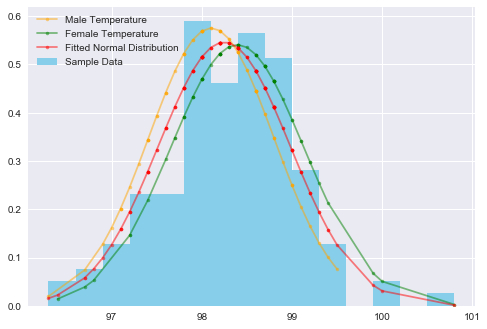

In [35]:
import numpy as np
from scipy.stats import kurtosis,skew
import scipy.stats as stats

#ploting male data
temp_sorted_m=sorted(male_temp.temperature)
hmean_m = np.mean(temp_sorted_m)
hstd_m = np.std(temp_sorted_m)
pdf = stats.norm.pdf(temp_sorted_m, hmean_m, hstd_m) # this is fitted 
plt.plot(temp_sorted_m, pdf,marker='.',color='orange',alpha=.5,label='Male Temperature') 
# including temp_sorted_m here is crucial

#ploting female data
temp_sorted_f=sorted(female_temp.temperature)
hmean_f = np.mean(temp_sorted_f)
hstd_f = np.std(temp_sorted_f)
pdf = stats.norm.pdf(temp_sorted_f, hmean_f, hstd_f) # this is fitted 
plt.plot(temp_sorted_f, pdf,marker='.',color='green',alpha=0.5,label='Female Temperature') 
# including temp_sorted_f here is crucial


#ploting sample data
temp_sorted=sorted(df.temperature)
hmean = np.mean(temp_sorted)
hstd = np.std(temp_sorted)
pdf = stats.norm.pdf(temp_sorted, hmean, hstd) # this is fitted 
plt.plot(temp_sorted, pdf,marker='.',color='red',alpha=0.5,label='Fitted Normal Distribution') 


_=plt.hist(df.temperature, normed=True, bins=15,color = "skyblue", ec="skyblue",lw=0,label='Sample Data') 
#adding the data graph
_=plt.legend(loc='upper left')
plt.show()

# Conclusion:

The mean normal body temperature of $37^oC$ or $98.6^oF$  as reported by Carl Wunderlich is a good estimate. But this reading is not supported statiscally by our sample data. We need more samples grouped by demographics and category to  statistically conclude that our body temperature is $98.6^oF$.
Based on the above analysis of the given sample data, the margin of error lies between $+_-1.43^oF$ of the sample mean $98.24^oF$ which means that the normal body temperature ranges from $96.81^oF$ to $99.68^oF$. Anything beyond this range can be considered as not normal.

